# 🏨 Airbnb Singapore Data Analysis

This notebook analyzes Airbnb listings in Singapore to extract patterns in pricing, availability, and preferences.

## 📊 Exploratory Data Analysis

In [132]:
data_sd = pd.read_csv("listings.csv")
data_sd.head()
data_sd_new=data_sd.dropna(subset=['price'])


In [133]:

average_price_by_region = data_sd.groupby('neighbourhood_group')['price'].mean().reset_index()

average_price_by_region_sorted = average_price_by_region.sort_values(by='price', ascending=False)

print(average_price_by_region_sorted)




  neighbourhood_group       price
0      Central Region  283.806213
4         West Region  256.463830
1         East Region  209.516667
3   North-East Region  179.580645
2        North Region  143.872093


In [134]:

average_price_by_room_type = data_sd.groupby('room_type')['price'].mean().reset_index()

average_price_by_room_type_sorted = average_price_by_room_type.sort_values(by='price', ascending=False)

print(average_price_by_room_type_sorted)




         room_type       price
0  Entire home/apt  398.091394
2     Private room  167.576293
1       Hotel room  165.121495
3      Shared room  144.905109


In [135]:
average_price_by_availability_365 = data_sd.groupby('availability_365')['price'].mean().reset_index()

average_price_by_availability_365_sorted = average_price_by_availability_365.sort_values(by='price', ascending=False)

print(average_price_by_availability_365_sorted)

     availability_365        price
83                105  2805.500000
44                 56  1574.000000
100               136  1337.500000
25                 32  1189.000000
251               308  1152.285714
..                ...          ...
48                 61    40.000000
139               182    38.000000
62                 79    36.000000
50                 63    27.000000
195               251          NaN

[307 rows x 2 columns]


In [136]:
data_sd_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.329000e+03,3.329000e+03,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,1781.000000,3329.000000,3329.000000,3329.000000
mean,3.123791e+17,1.614467e+08,1.310552,103.843143,270.361971,64.736257,10.490538,0.593150,48.725143,256.550916,2.474317
std,4.125964e+17,1.593711e+08,0.031912,0.042795,528.211076,65.730397,34.314728,1.363556,72.690411,133.921784,12.422888
min,7.160900e+04,2.366600e+04,1.221690,103.634572,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.544055e+07,2.537534e+07,1.291910,103.833970,80.000000,6.000000,0.000000,0.050000,3.000000,173.000000,0.000000
50%,4.415870e+07,1.110658e+08,1.304490,103.845658,175.000000,92.000000,1.000000,0.180000,12.000000,330.000000,0.000000
75%,7.764056e+17,2.388916e+08,1.317230,103.859697,289.000000,92.000000,5.000000,0.640000,62.000000,364.000000,0.000000
max,1.052532e+18,5.517540e+08,1.457802,103.989570,10286.000000,1000.000000,757.000000,29.620000,260.000000,365.000000,396.000000


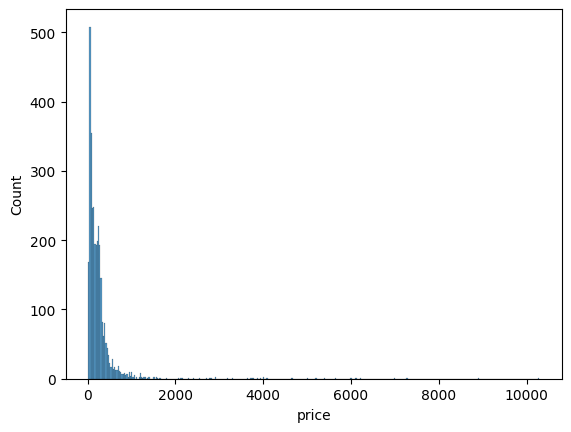

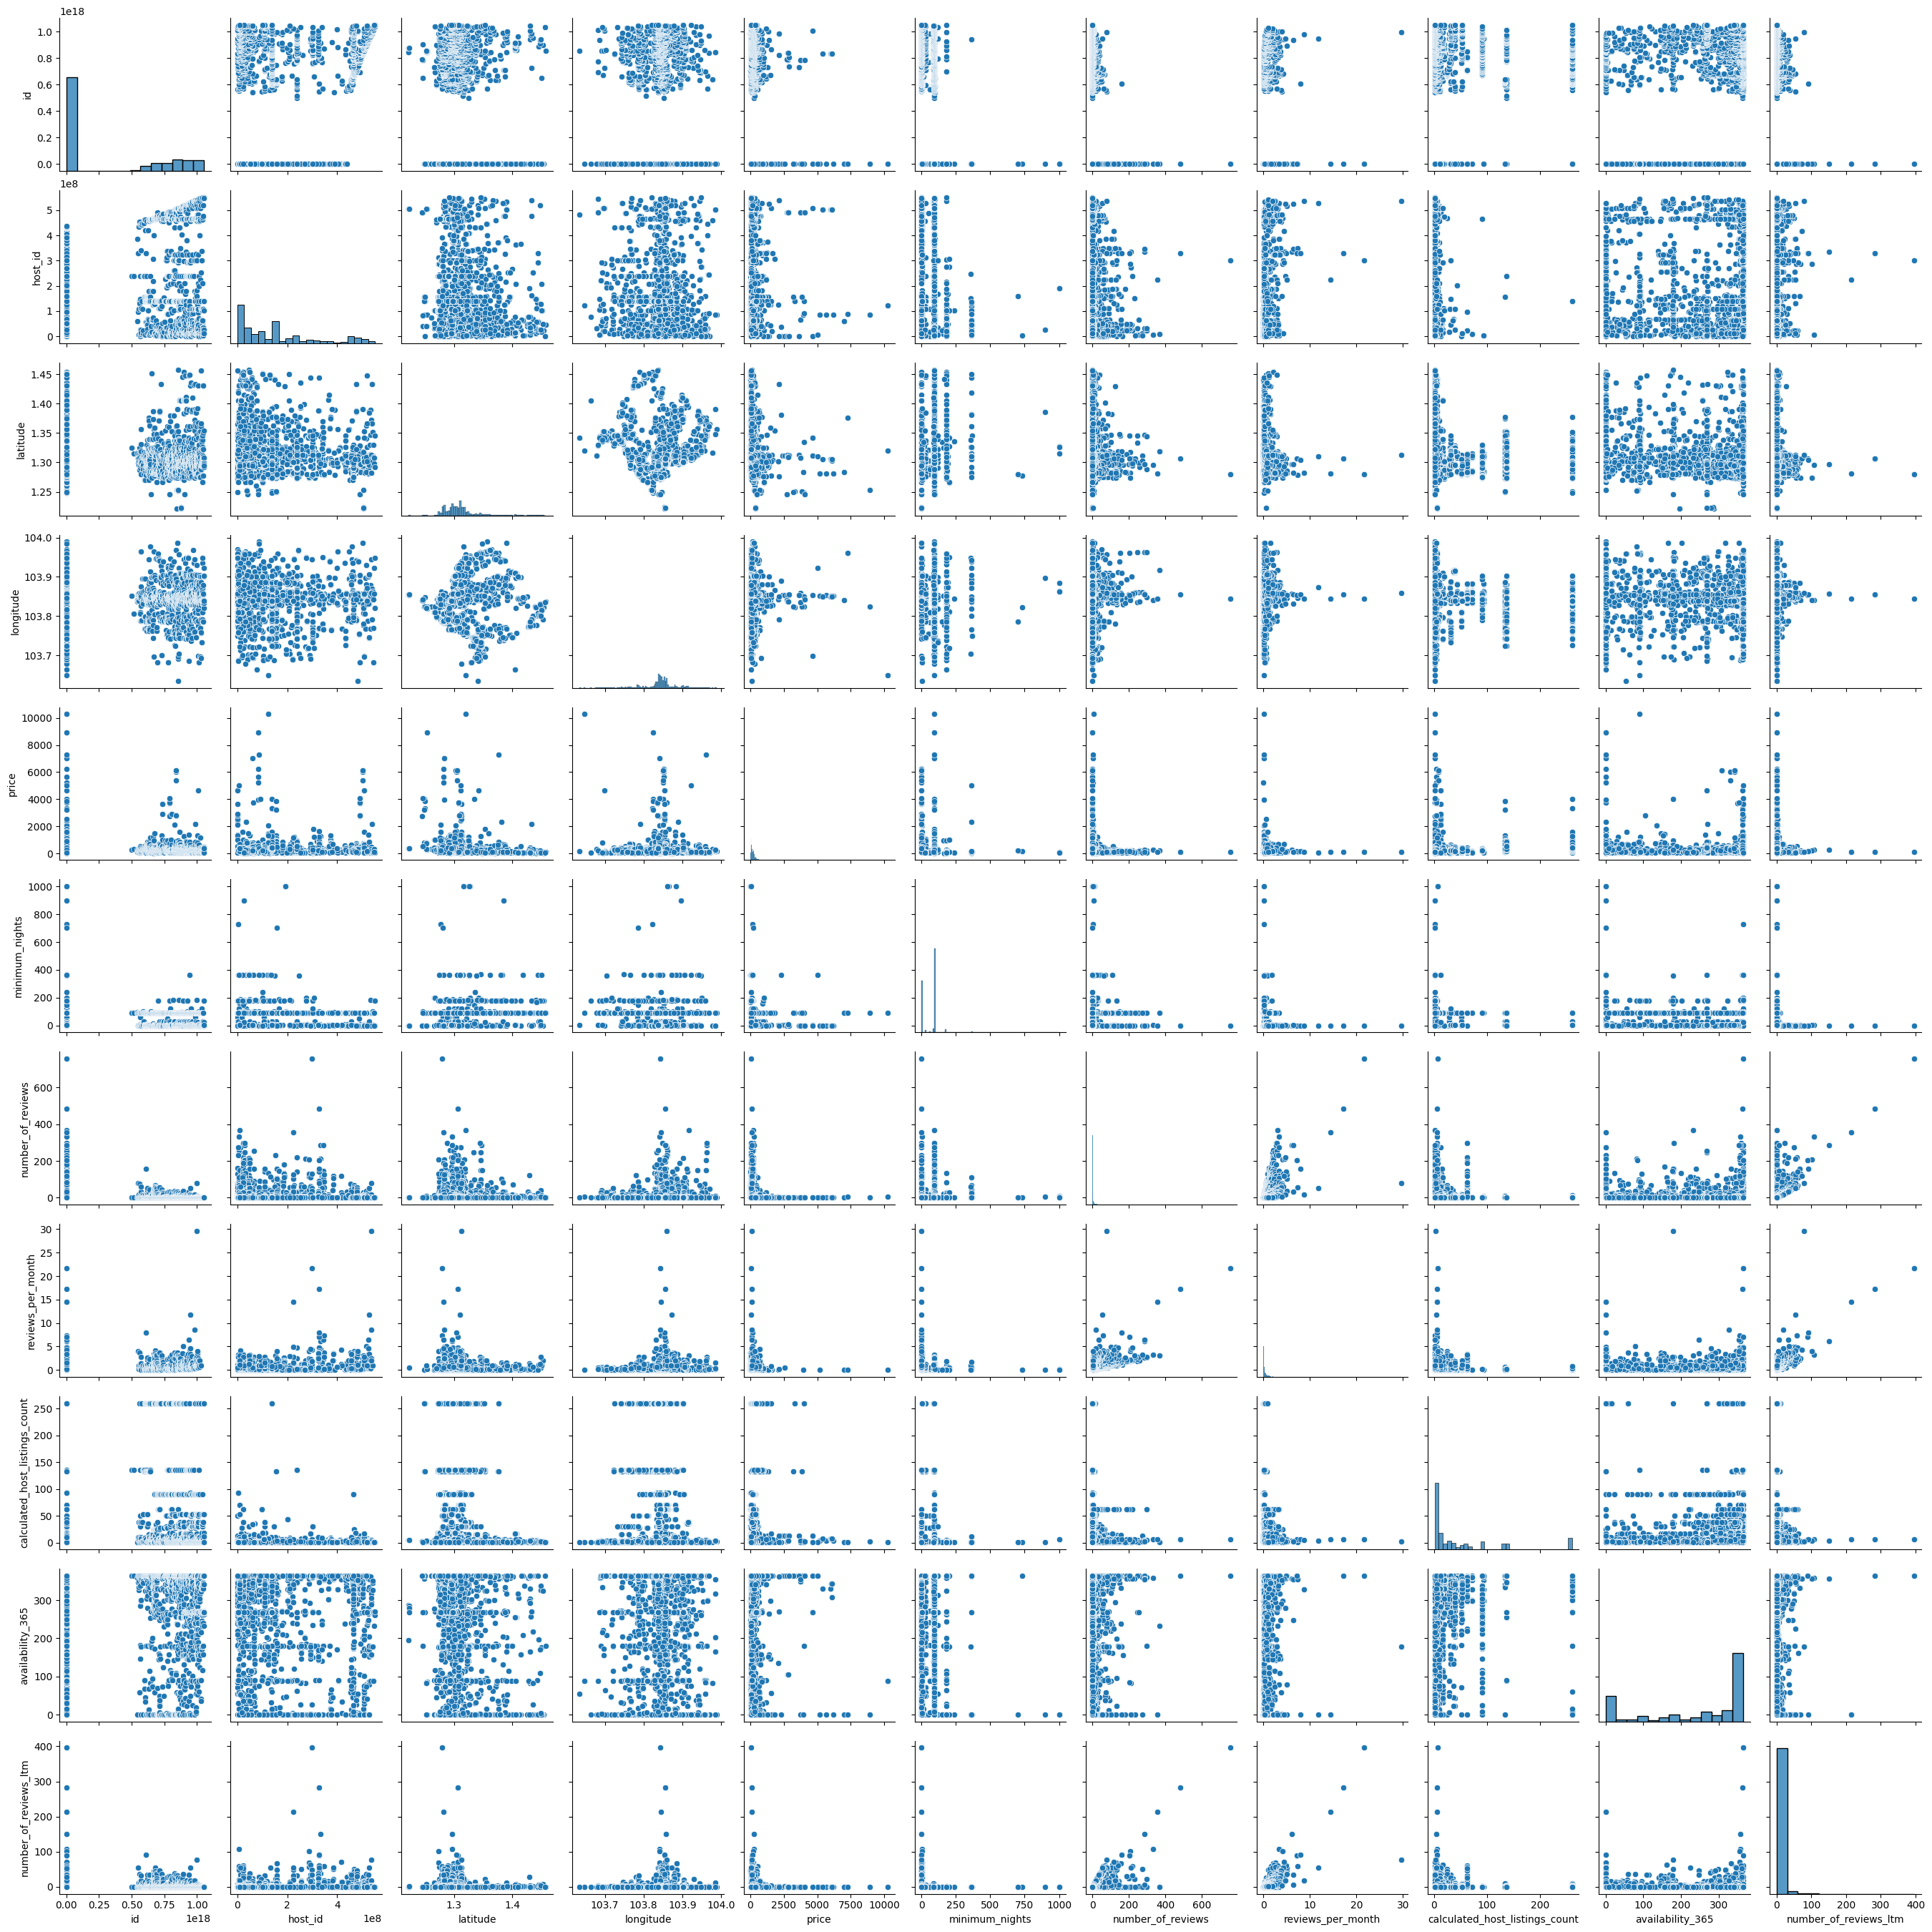

In [137]:
sns.histplot(data_sd['price'])
plt.show()
sns.pairplot(data_sd)
plt.show()

In [138]:
X = data_sd_new[['number_of_reviews']]  
y = data_sd_new['price']  
y = y[~np.isnan(y)]

In [139]:
data_sd_new.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1548
reviews_per_month                 1548
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1967
dtype: int64

In [140]:
data_sd_new.shape

(3329, 18)

In [141]:
data_sd_new=data_sd.dropna(subset=['price'])

## 🛠 Feature Engineering

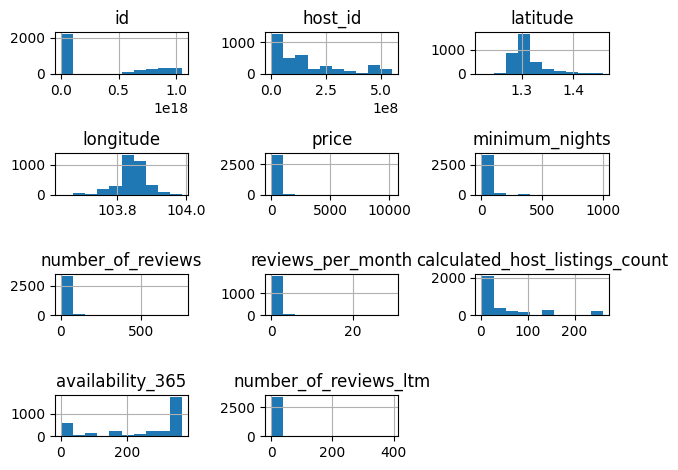

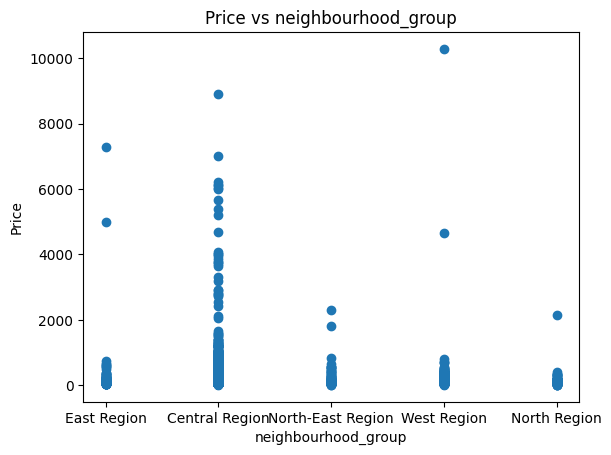

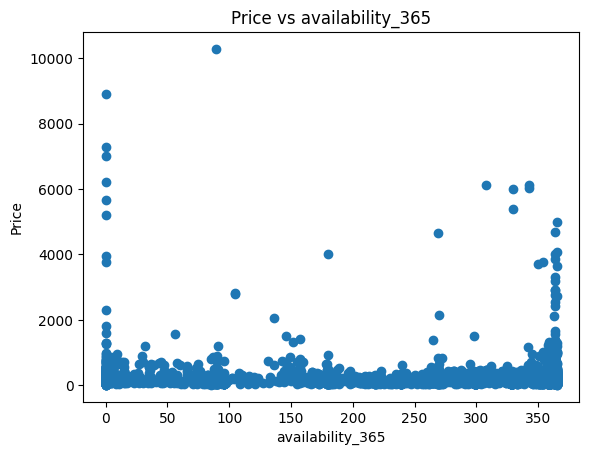

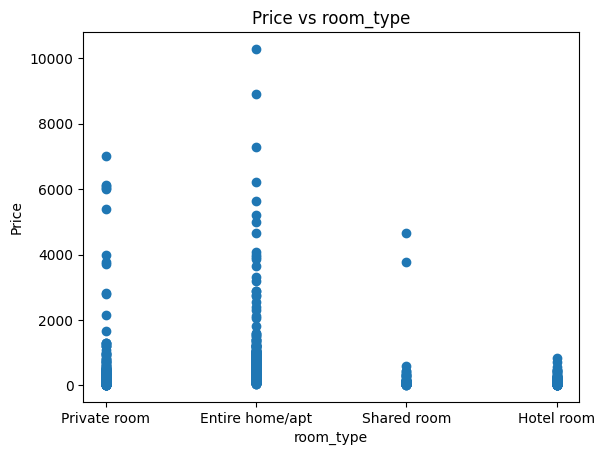

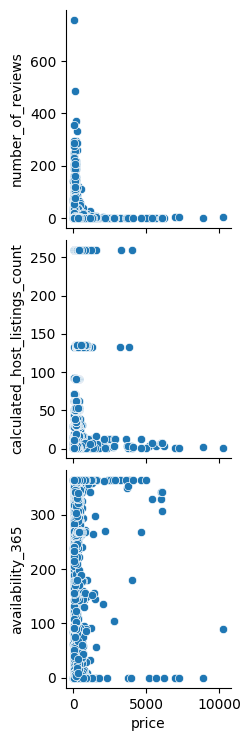

In [142]:
df = pd.DataFrame(data_sd)


df.hist()
plt.tight_layout()
plt.show()

# Построение scatter plot для пары переменных (Price vs Neighbourhood group)
plt.scatter(df['neighbourhood_group'], df['price'])
plt.xlabel('neighbourhood_group')
plt.ylabel('Price')
plt.title('Price vs neighbourhood_group')
plt.show()

# Построение scatter plot для пары переменных (Price vs availability during one year )
plt.scatter(df['availability_365'], df['price'])
plt.xlabel('availability_365')
plt.ylabel('Price')
plt.title('Price vs availability_365')
plt.show()

# Построение scatter plot для пары переменных (Price vs Room type)
plt.scatter(df['room_type'], df['price'])
plt.xlabel('room_type')
plt.ylabel('Price')
plt.title('Price vs room_type')
plt.show()


sns.pairplot(df, x_vars=['price'], y_vars=['number_of_reviews', 'calculated_host_listings_count', 'availability_365'])
plt.show()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [144]:
y_train.shape

(2663,)

Mean Squared Error: 306409.21603268886


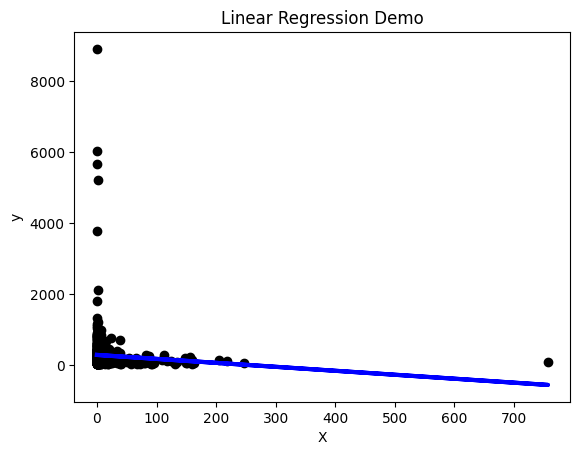

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Demo')
plt.show()

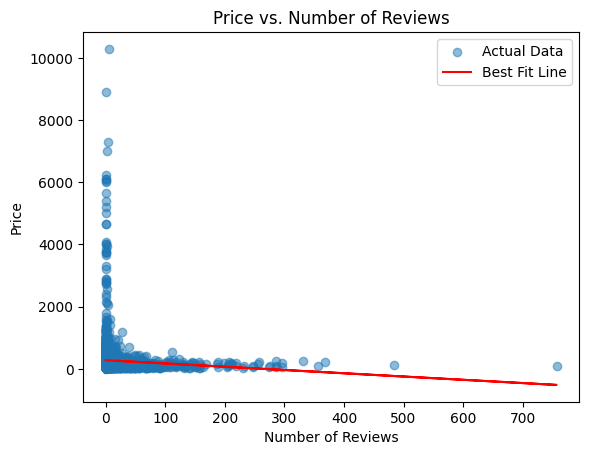

Linear Regression Model Summary:
-------------------------------
Intercept: 281.37615185521474
Coefficient: -1.0499158012201115


In [146]:
X = data_sd_new[['number_of_reviews']]  # Independent variable
y = data_sd_new['price']  # Dependent variable

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict prices based on the number of reviews
predicted_prices = model.predict(X)

# Plot the best fit line
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, predicted_prices, color='red', label='Best Fit Line')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Number of Reviews')
plt.legend()
plt.show()

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the summary
print("Linear Regression Model Summary:")
print("-------------------------------")
print("Intercept:", intercept)
print("Coefficient:", coefficients[0])

## 🤖 Model Training

In [147]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [148]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [149]:
y_pred_rf = rf_classifier.predict(X_test)

Accuracy: 0.025525525525525526
Random Forest Mean Squared Error: 355797.0630630631


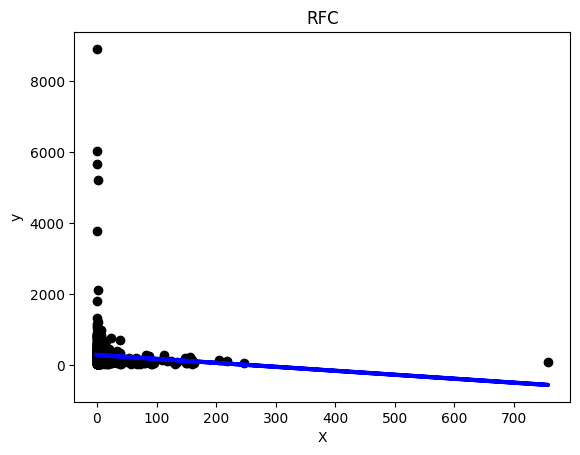

In [150]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
rf_predictions = rf_classifier.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
plt.scatter(X_test['number_of_reviews'], y_test,  color='black')
plt.plot(X_test['number_of_reviews'], y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('RFC')
plt.show()

In [151]:
#xgb_classifier = xgb.XGBClassifier(random_state=1)
xgb_regressor = XGBRegressor()

In [152]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [153]:
y_pred_xgb = xgb_regressor.predict(X_test)

xgb Mean Squared Error: 355797.0630630631


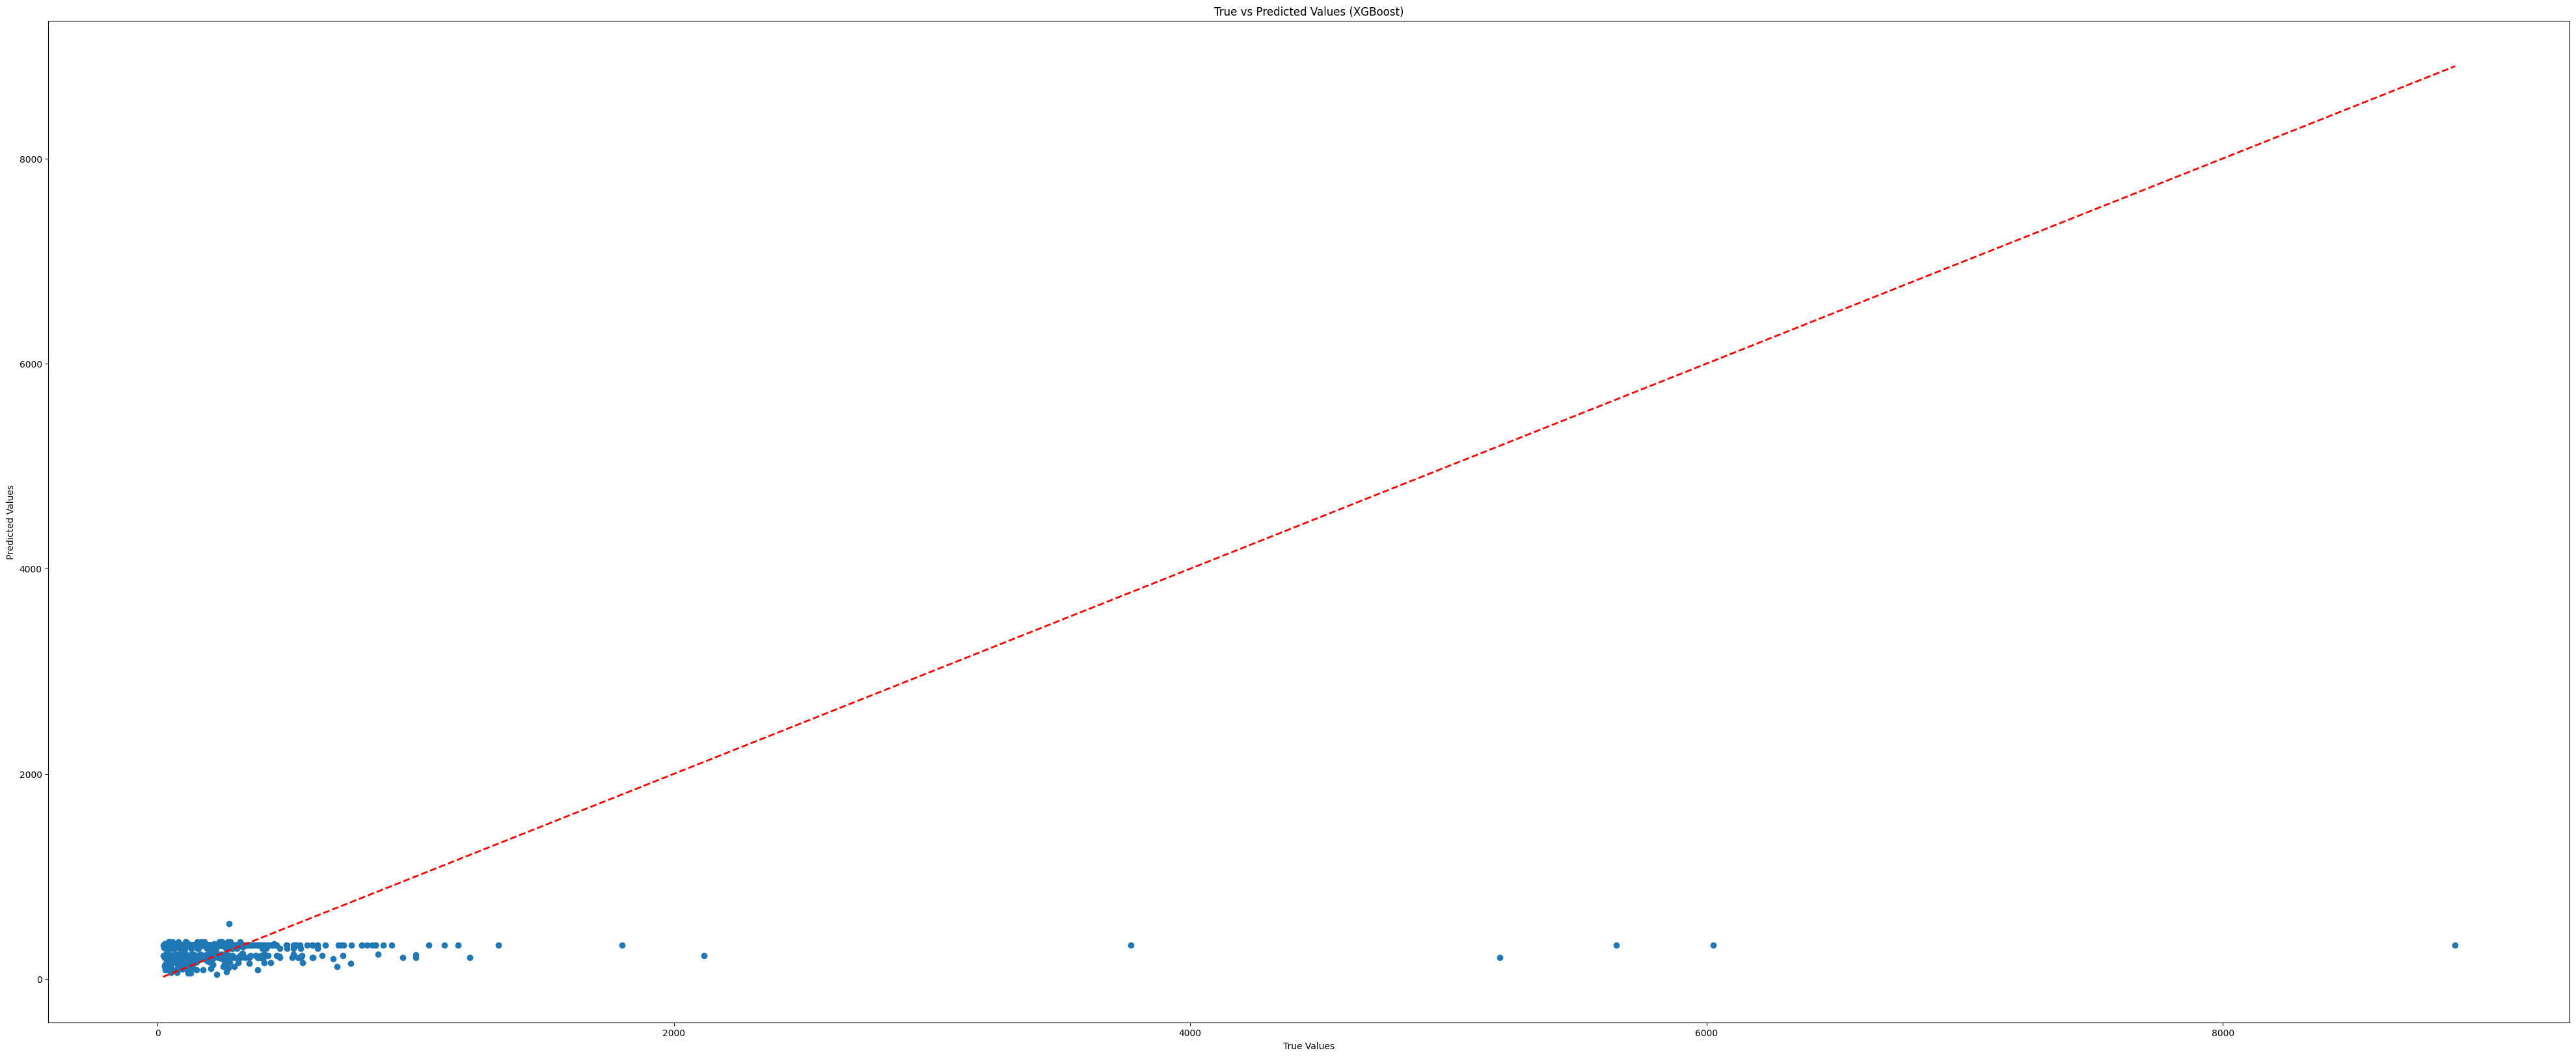

In [154]:

rf_predictions_2 = xgb_regressor.predict(X_test)
rf_mse_2 = mean_squared_error(y_test, rf_predictions)
print("xgb Mean Squared Error:", rf_mse_2)
plt.figure(figsize=(50, 20))
plt.scatter(y_test, rf_predictions_2, alpha=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.title('True vs Predicted Values (XGBoost)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [155]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

## 📈 Model Evaluation & Visualization

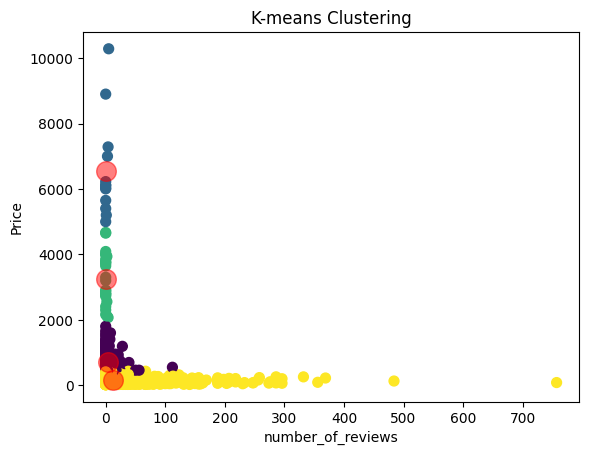

In [156]:
X = data_sd_new[['number_of_reviews', 'price']].values

# KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('number_of_reviews')
plt.ylabel('Price')
plt.show()

In [157]:
X = data_sd_new[['minimum_nights' ]]  
y = data_sd_new['price']  

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Mean Squared Error: 302096.2640293232


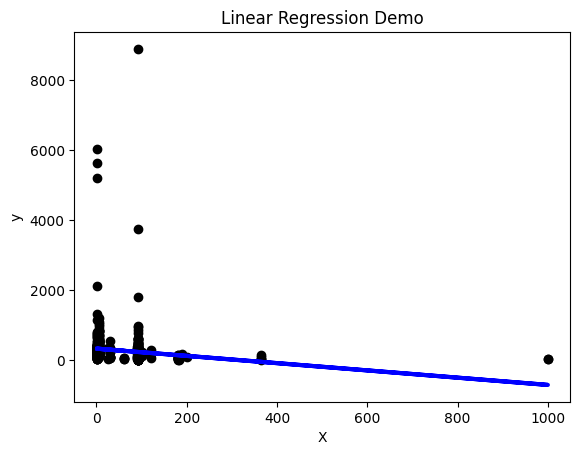

In [159]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Demo')
plt.show()

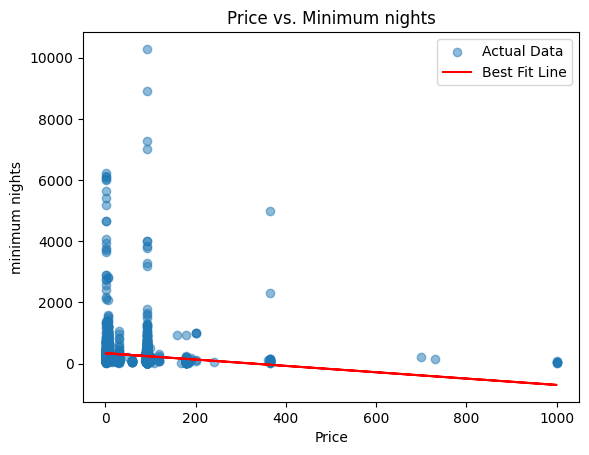

Linear Regression Model Summary:
-------------------------------
Intercept: 339.0141642287816
Coefficient: -1.0369345385383302



In [160]:
plt.scatter(X['minimum_nights'], y, alpha=0.5, label='Actual Data')

# Plot the best fit line
plt.plot(X, model.predict(X), color='red', label='Best Fit Line')

plt.xlabel('Price')
plt.ylabel('minimum nights')
plt.title('Price vs. Minimum nights')
plt.legend()
plt.show()

coefficients = model.coef_
intercept = model.intercept_

# Print the summary
print("Linear Regression Model Summary:")
print("-------------------------------")
print("Intercept:", intercept)
print("Coefficient:", coefficients[0])
#print("Coefficient:", coefficients[1])
print("")

## ✅ Conclusion
This project shows that more affordable listings are more frequently booked. Most users prefer mid- to low-price accommodations.